In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas
import matplotlib


# Train log

In [2]:
models = ['densenet121','densenet161','densenet169','densenet201','resnet18','resnet50','resnet101','resnet152','vgg11_bn','vgg13_bn','vgg16_bn','vgg19_bn',]
valid_models = []
valid_raw_models = []
for model in models:
    try:

        pandas.read_csv('./models/pretrained/'+model+'/best_pred.csv')
        valid_models.append(model)
    except:
        print(model+' have not trained')

for model in models:
    try:
        pandas.read_csv('./models/raw/'+model+'/best_pred.csv')
        valid_raw_models.append(model)
    except:
        print('raw '+model+' have not trained')


In [3]:
train_acc1 = {}
train_acc5 = {}
val_acc1 = {}
val_acc5 = {}


for model in valid_models:
    train_log = pandas.read_csv('./models/pretrained/'+model+'/train_log.csv').to_dict()
    #print(train_log['train_acc1'])
    train_acc1[model+'_pretrained'] = train_log['train_acc1'].values()
    train_acc5[model+'_pretrained'] = train_log['train_acc5'].values()
    val_acc1[model+'_pretrained'] = train_log['val_acc1'].values()
    val_acc5[model+'_pretrained'] = train_log['val_acc5'].values()

for model in valid_raw_models:
    train_log = pandas.read_csv('./models/raw/'+model+'/train_log.csv').to_dict()
    #print(train_log['train_acc1'])
    train_acc1[model] = train_log['train_acc1'].values()
    train_acc5[model] = train_log['train_acc5'].values()
    val_acc1[model] = train_log['val_acc1'].values()
    val_acc5[model] = train_log['val_acc5'].values()

In [4]:
train_best1 = {}
train_best5 = {}

val_best1 = {}
val_best5= {}

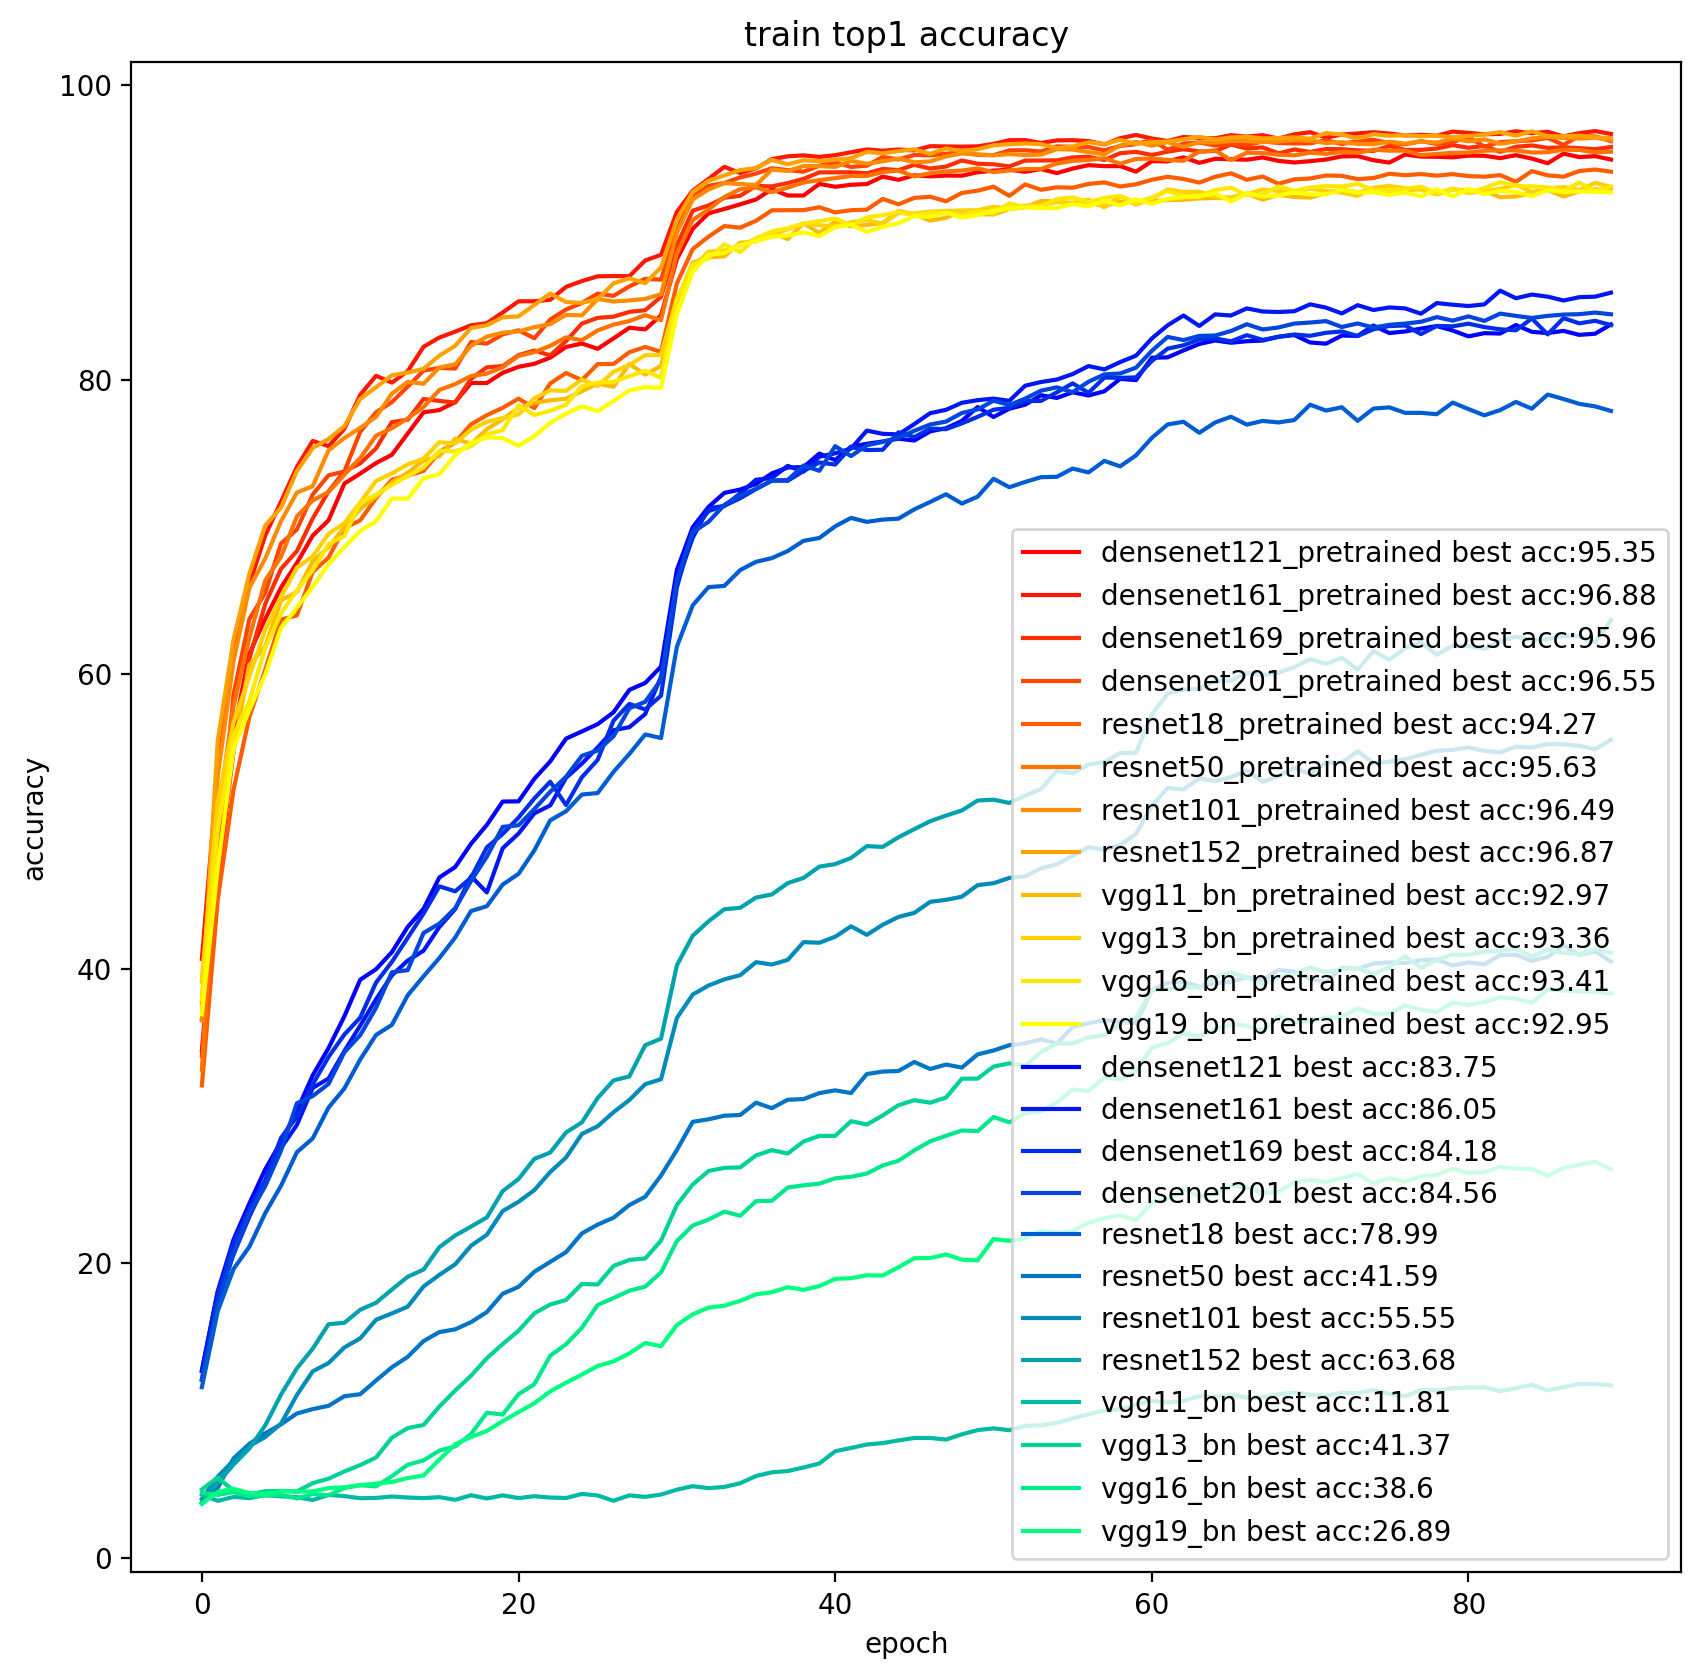

In [5]:
colors = matplotlib.cm.get_cmap("autumn")
col = colors(np.linspace(0,1,len(valid_models)))

plt.figure(figsize= [10,10],dpi=200)
for model in valid_models:
    best_acc = np.max(list(train_acc1[model+'_pretrained']))
    train_best1[model+'_pretrained'] = best_acc
    plt.plot(range(len(train_acc1[model+'_pretrained'])),
    train_acc1[model+'_pretrained'],
    label=model+'_pretrained'+' best acc:'+ str(round(best_acc,2)),
    color=col[valid_models.index(model)])


colors = matplotlib.cm.get_cmap("winter")
col = colors(np.linspace(0,1,len(valid_models)))

for model in valid_raw_models:
    best_acc = np.max(list(train_acc1[model]))
    train_best1[model] = best_acc
    plt.plot(range(len(train_acc1[model])),
    train_acc1[model],
    label=model+' best acc:'+ str(round(best_acc,2)),
    color=col[valid_raw_models.index(model)])




    

plt.legend()
plt.title('train top1 accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('./plots/train_acc1.png')

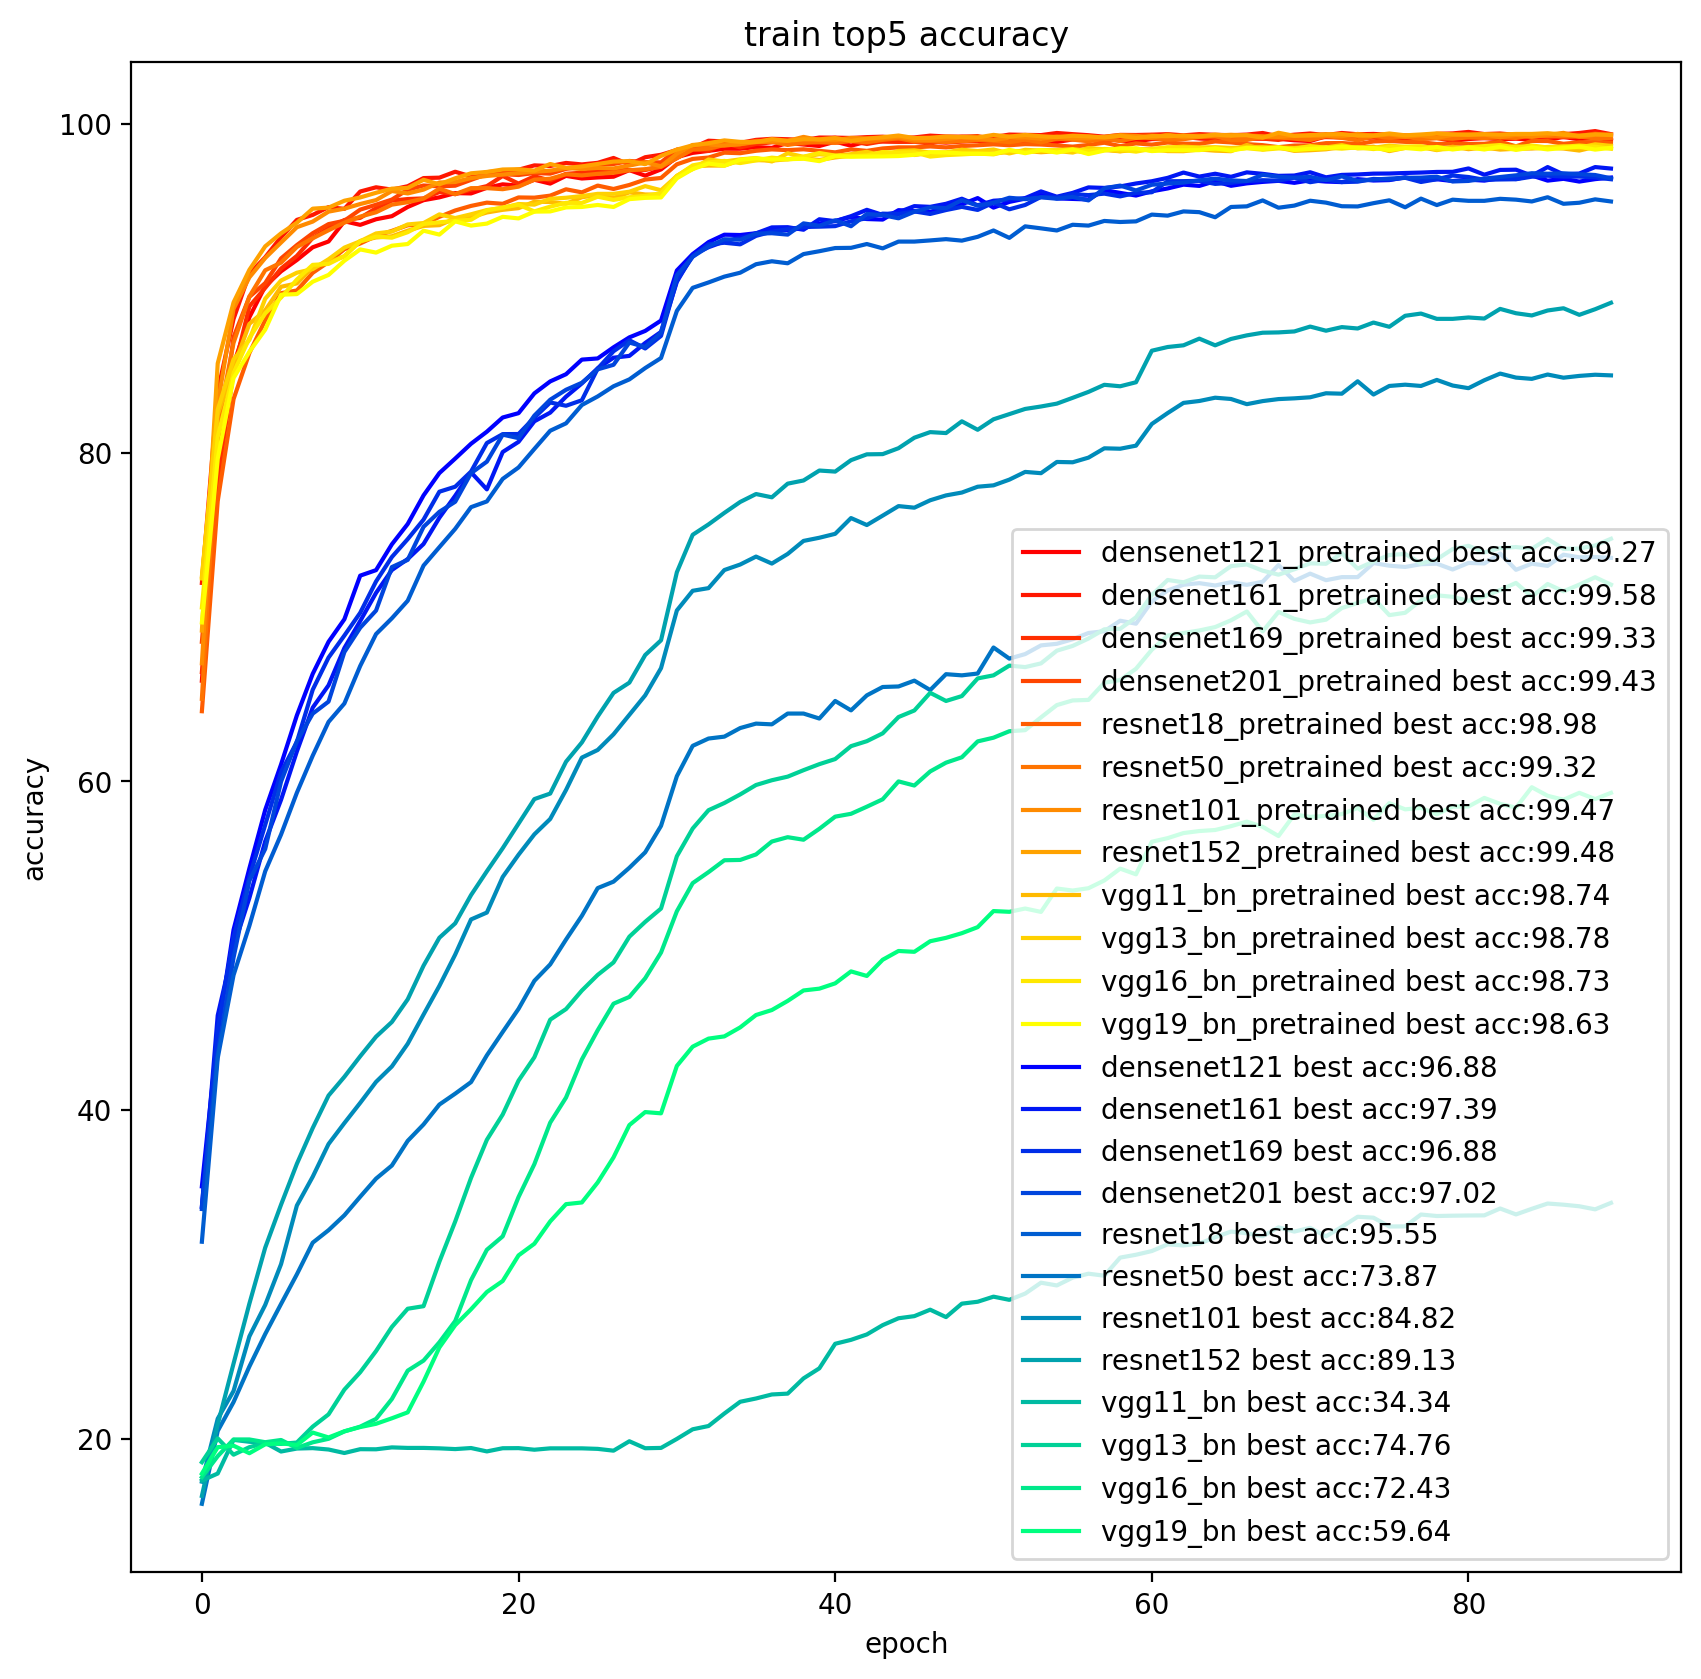

In [6]:
colors = matplotlib.cm.get_cmap("autumn")
col = colors(np.linspace(0,1,len(valid_models)))

plt.figure(figsize= [10,10],dpi=200)
for model in valid_models:
    best_acc = np.max(list(train_acc5[model+'_pretrained']))
    train_best5[model+'_pretrained'] = best_acc
    plt.plot(range(len(train_acc5[model+'_pretrained'])),
    train_acc5[model+'_pretrained'],
    label=model+'_pretrained'+' best acc:'+ str(round(best_acc,2)),
    color=col[valid_models.index(model)])


colors = matplotlib.cm.get_cmap("winter")
col = colors(np.linspace(0,1,len(valid_models)))

for model in valid_raw_models:
    best_acc = np.max(list(train_acc5[model]))
    train_best5[model] = best_acc
    plt.plot(range(len(train_acc5[model])),
    train_acc5[model],
    label=model+' best acc:'+ str(round(best_acc,2)),
    color=col[valid_raw_models.index(model)])
    
plt.legend()
plt.title('train top5 accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('./plots/train_acc5.png')

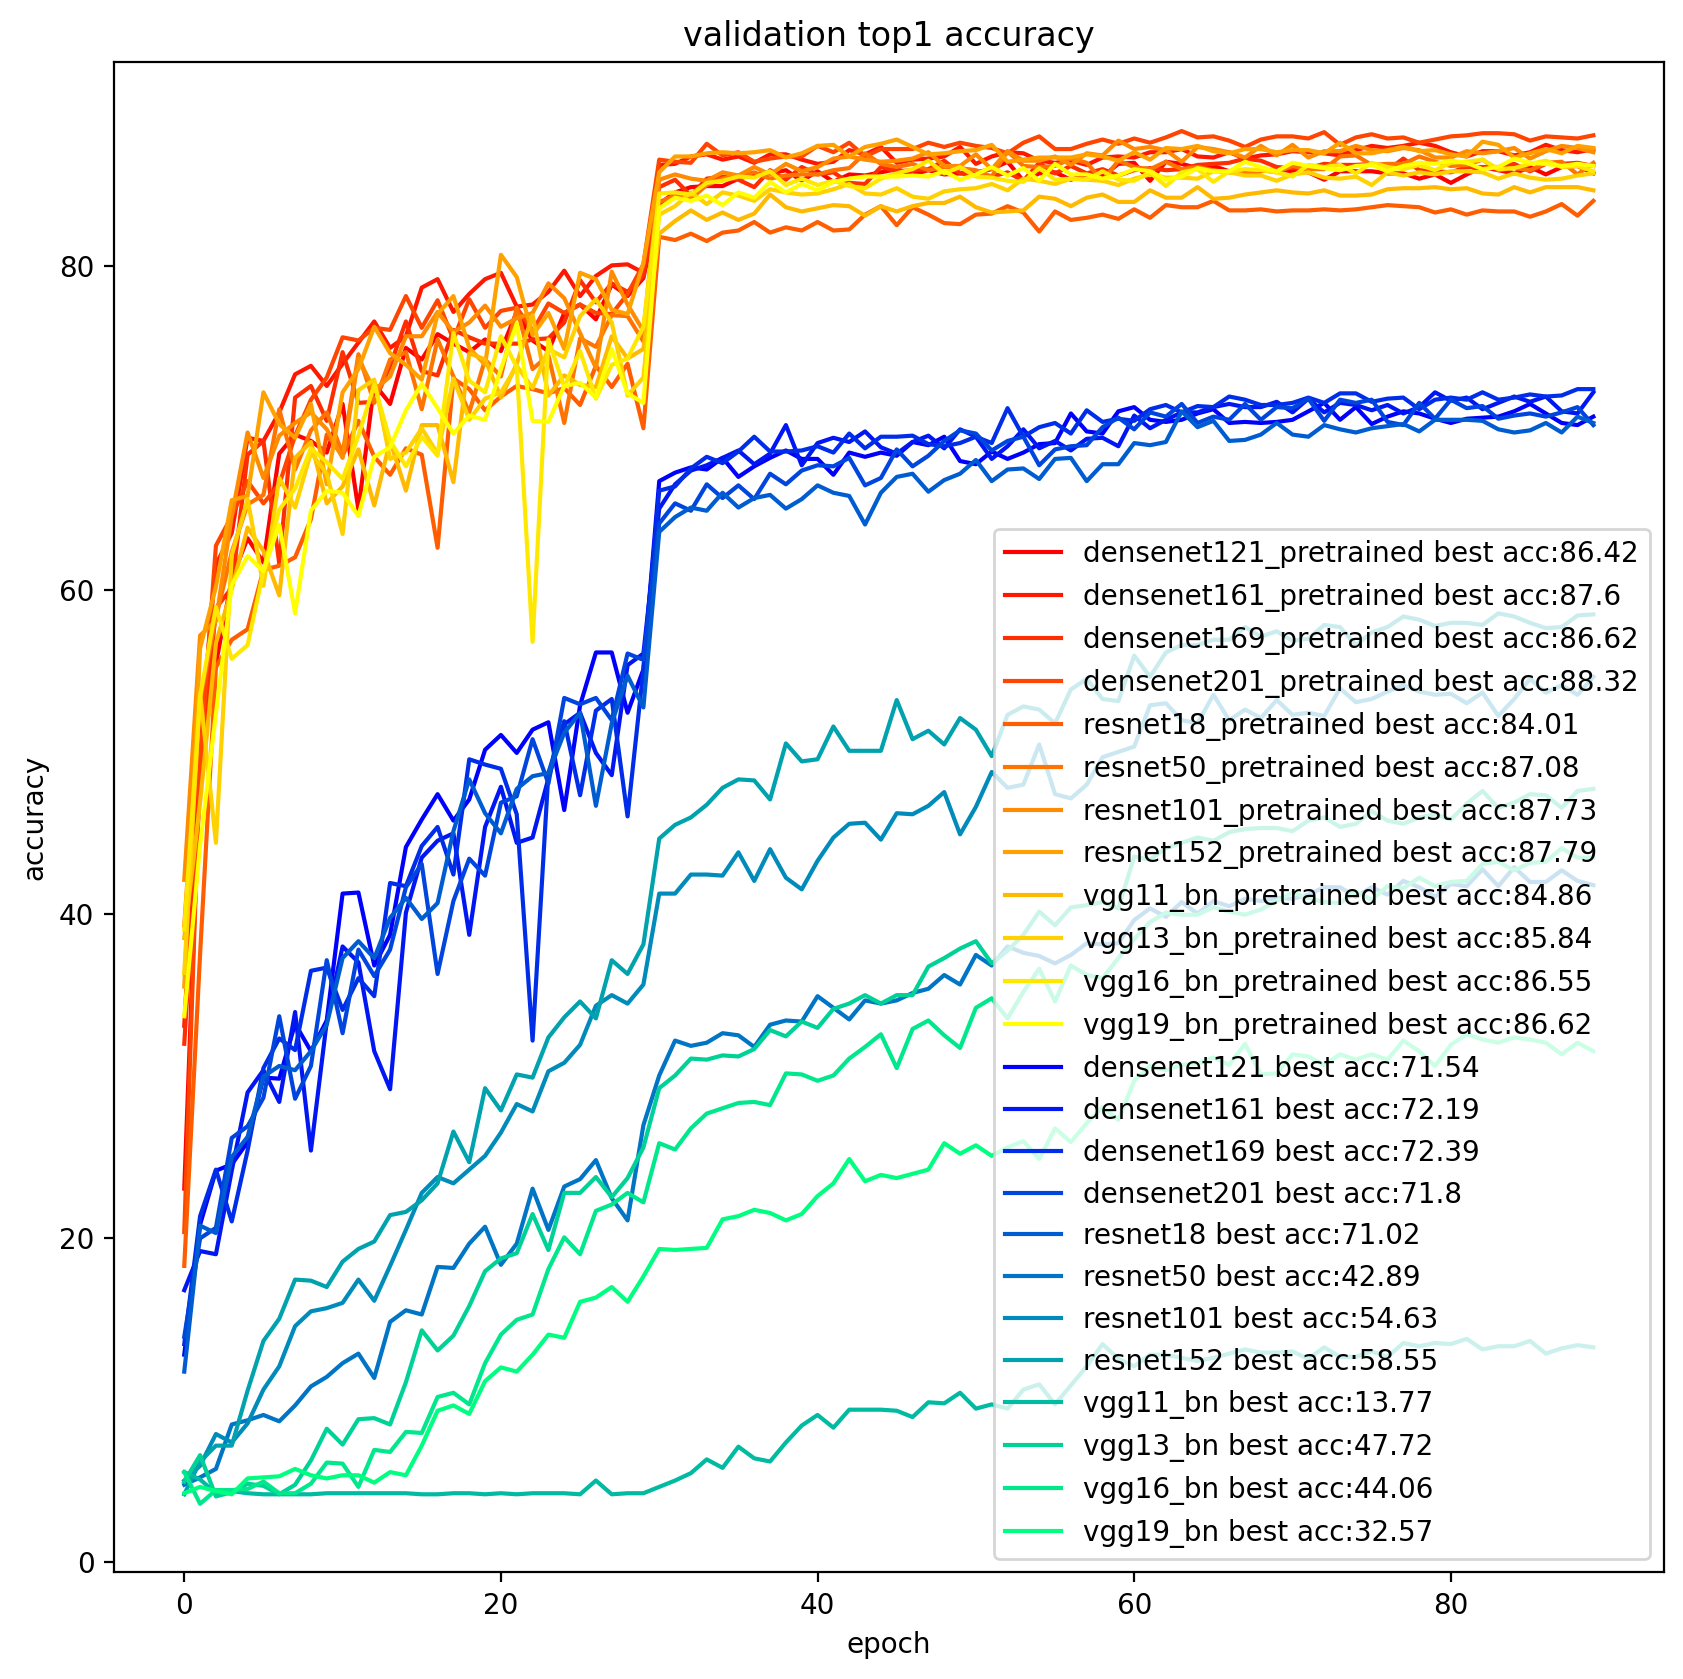

In [7]:
colors = matplotlib.cm.get_cmap("autumn")
col = colors(np.linspace(0,1,len(valid_models)))

plt.figure(figsize= [10,10],dpi=200)
for model in valid_models:
    best_acc = np.max(list(val_acc1[model+'_pretrained']))
    val_best1[model+'_pretrained'] = best_acc
    plt.plot(range(len(val_acc1[model+'_pretrained'])),
    val_acc1[model+'_pretrained'],
    label=model+'_pretrained'+' best acc:'+ str(round(best_acc,2)),
    color=col[valid_models.index(model)])


colors = matplotlib.cm.get_cmap("winter")
col = colors(np.linspace(0,1,len(valid_models)))

for model in valid_raw_models:
    best_acc = np.max(list(val_acc1[model]))
    val_best1[model] = best_acc
    plt.plot(range(len(val_acc1[model])),
    val_acc1[model],
    label=model+' best acc:'+ str(round(best_acc,2)),
    color=col[valid_raw_models.index(model)])



plt.legend()
plt.title('validation top1 accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.savefig('./plots/val_acc1.png')

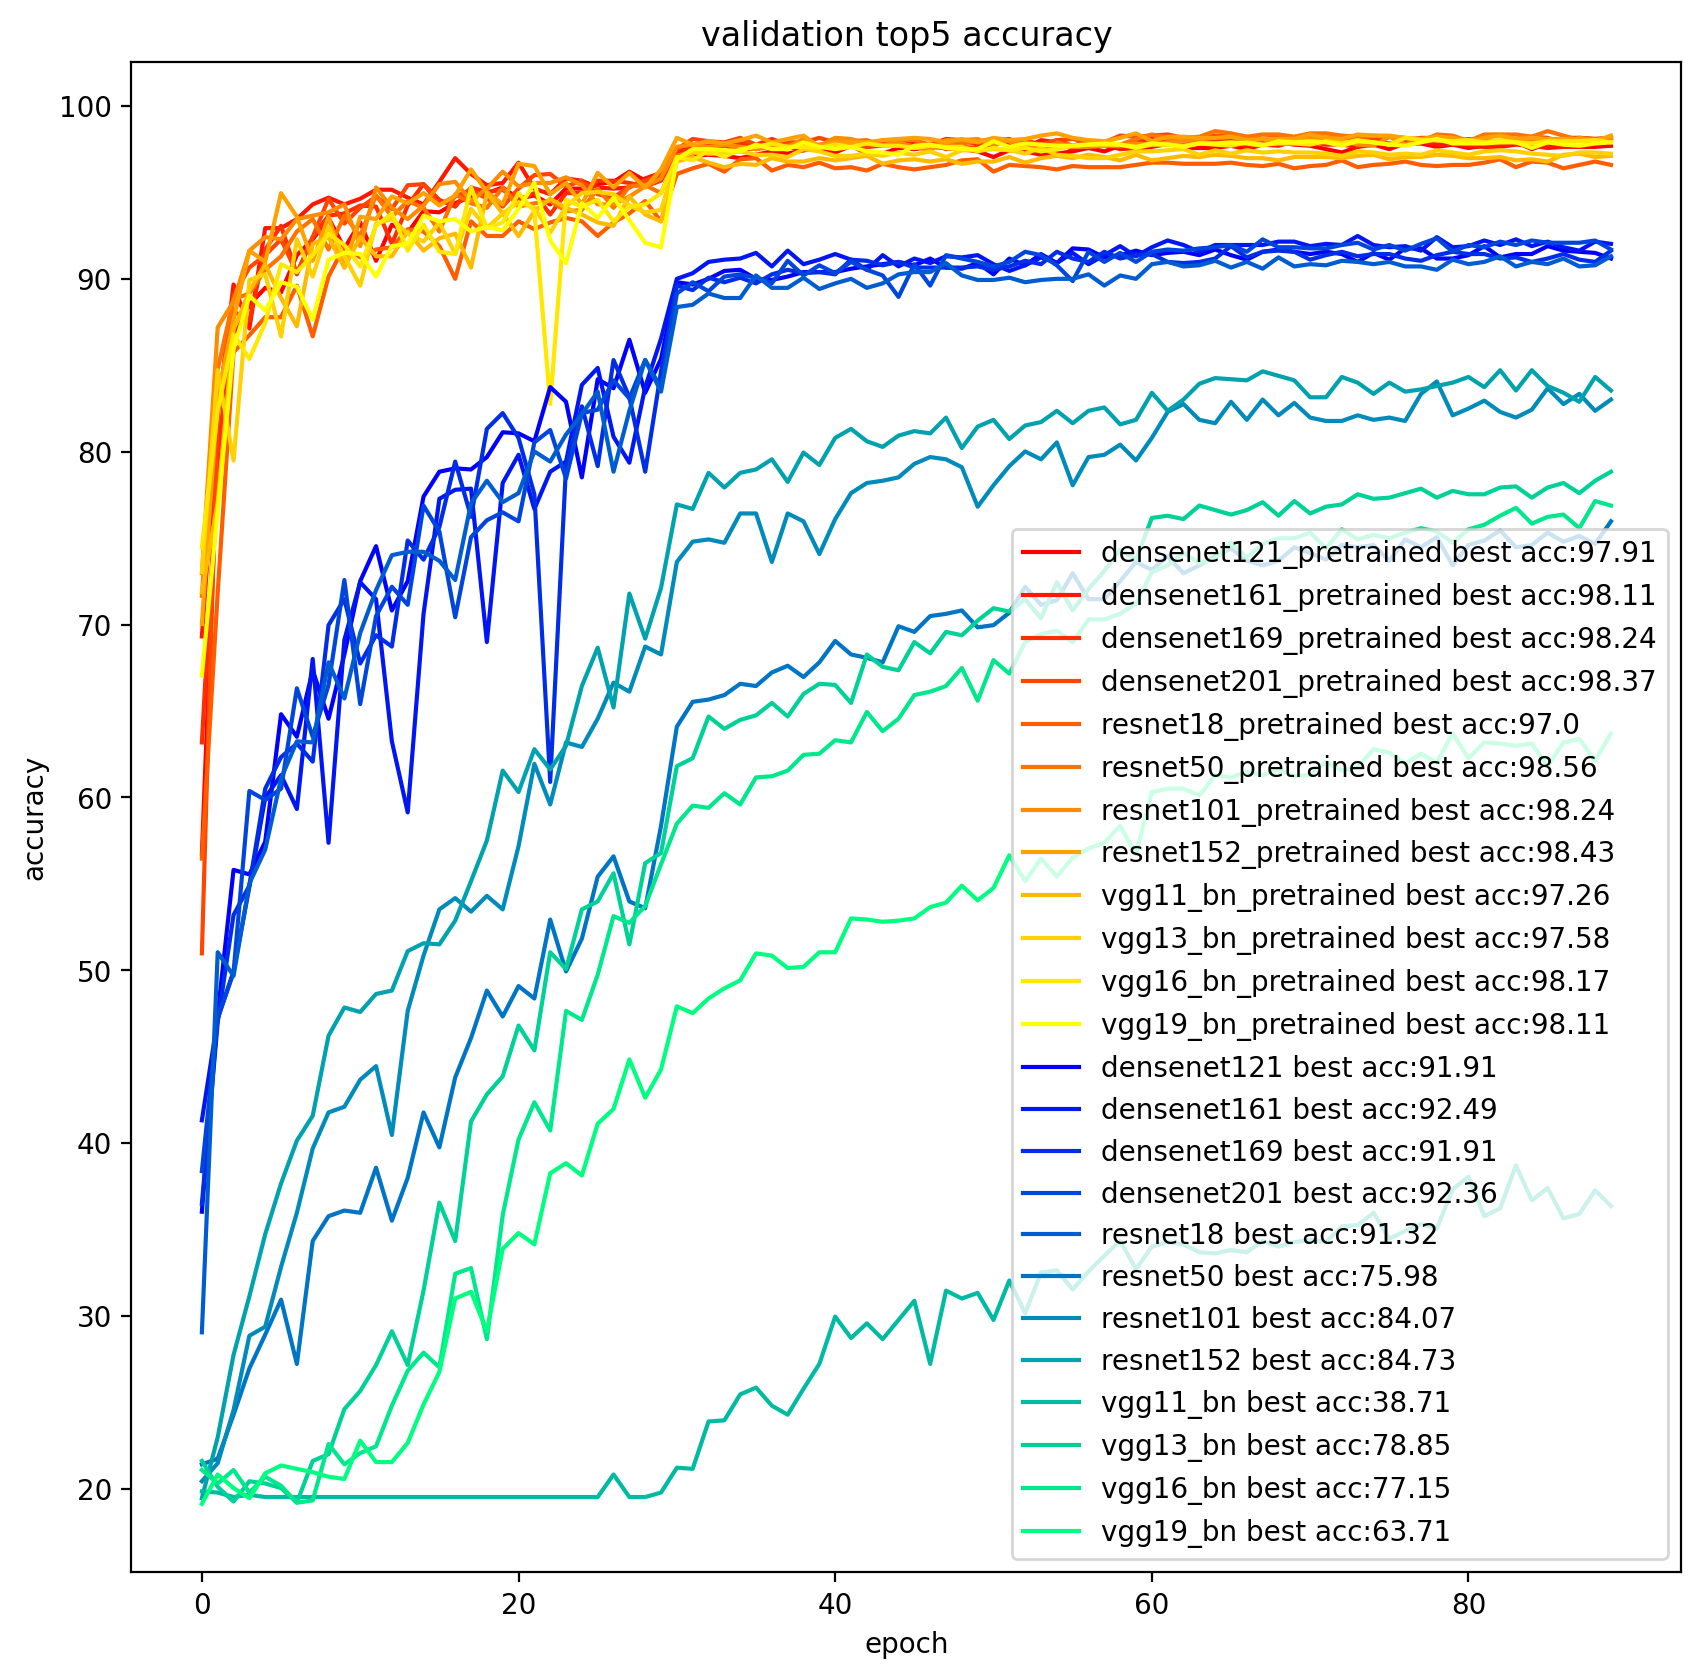

In [8]:
colors = matplotlib.cm.get_cmap("autumn")
col = colors(np.linspace(0,1,len(valid_models)))

plt.figure(figsize= [10,10],dpi=200)
for model in valid_models:
    best_acc = np.max(list(val_acc5[model+'_pretrained']))
    val_best5[model+'_pretrained'] = best_acc
    plt.plot(range(len(val_acc5[model+'_pretrained'])),
    val_acc5[model+'_pretrained'],
    label=model+'_pretrained'+' best acc:'+ str(round(best_acc,2)),
    color=col[valid_models.index(model)])


colors = matplotlib.cm.get_cmap("winter")
col = colors(np.linspace(0,1,len(valid_models)))

for model in valid_raw_models:
    best_acc = np.max(list(val_acc5[model]))
    val_best5[model] = best_acc
    plt.plot(range(len(val_acc5[model])),
    val_acc5[model],
    label=model+' best acc:'+ str(round(best_acc,2)),
    color=col[valid_raw_models.index(model)])


plt.legend()
plt.title('validation top5 accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('./plots/val_acc5.png')

In [9]:

print(len(list(train_best1.values())))
print(len(list(train_best5.values())))
print(len(list(val_best1.values())))
print(len(list(val_best5.values())))

all_valid_models = []
for key in train_best1:
    all_valid_models.append(key)

acc_table = pandas.DataFrame({
    'model':all_valid_models,
    'best train top1 acc':list(train_best1.values()),
    'best train top5 acc':list(train_best5.values()),
    'best val top1 acc':list(val_best1.values()),
    'best val top5 acc':list(val_best5.values()),
})
acc_table.sort_index(by='best val top1 acc',ascending=False)


24
24
24
24


model  best train top1 acc  best train top5 acc  \
3   densenet201_pretrained            96.553284            99.433067   
7     resnet152_pretrained            96.868965            99.478165   
6     resnet101_pretrained            96.488861            99.471725   
1   densenet161_pretrained            96.881851            99.581245   
5      resnet50_pretrained            95.625565            99.323547   
2   densenet169_pretrained            95.960579            99.329987   
11     vgg19_bn_pretrained            92.951942            98.634201   
10     vgg16_bn_pretrained            93.409355            98.730835   
0   densenet121_pretrained            95.348541            99.265564   
9      vgg13_bn_pretrained            93.364258            98.775932   
8      vgg11_bn_pretrained            92.971268            98.737282   
4      resnet18_pretrained            94.272652            98.982094   
14             densenet169            84.177299            96.875404   
13             densenet161            86.045616            97.390800   
15             densenet201            84.557404            97.017143   
12             densenet121            83.752098            96.875404   
16                resnet18            78.991112            95.554703   
19               resnet152            63.677364            89.131561   
18               resnet101            55.546967            84.821548   
21                vgg13_bn            41.367092            74.764854   
22                vgg16_bn            38.596832            72.426239   
17                resnet50            41.586136            73.869347   
23                vgg19_bn            26.890865            59.644379   
20                vgg11_bn            11.809046            34.344803   

    best val top1 acc  best val top5 acc  
3           88.315926          98.368149  
7           87.793732          98.433418  
6           87.728462          98.237602  
1           87.597916          98.107048  
5           87.075722          98.563972  
2           86.618797          98.237602  
11          86.618797          98.107048  
10          86.553528          98.172325  
0           86.422981          97.911232  
9           85.835510          97.584854  
8           84.856400          97.258484  
4           84.007835          96.997391  
14          72.389038          91.906006  
13          72.193214          92.493477  
15          71.801567          92.362923  
12          71.540474          91.906006  
16          71.018280          91.318542  
19          58.550915          84.725853  
18          54.634464          84.073105  
21          47.715405          78.851173  
22          44.060055          77.154045  
17          42.885117          75.979111  
23          32.571800          63.707573  
20          13.772846          38.707573

# Multiple Matrix

In [10]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score, recall_score,accuracy_score

In [11]:
acc_train_table = pandas.DataFrame({
    'model':all_valid_models,
    'train top1 acc':list(train_best1.values()),
    'train top5 acc':list(train_best5.values()),

})
acc_train_table = acc_train_table.sort_index(by='train top1 acc',ascending=False)

acc_train_table.to_csv('./plots/table/train_acc.csv',index=False)
acc_train_table

model  train top1 acc  train top5 acc
1   densenet161_pretrained       96.881851       99.581245
7     resnet152_pretrained       96.868965       99.478165
3   densenet201_pretrained       96.553284       99.433067
6     resnet101_pretrained       96.488861       99.471725
2   densenet169_pretrained       95.960579       99.329987
5      resnet50_pretrained       95.625565       99.323547
0   densenet121_pretrained       95.348541       99.265564
4      resnet18_pretrained       94.272652       98.982094
10     vgg16_bn_pretrained       93.409355       98.730835
9      vgg13_bn_pretrained       93.364258       98.775932
8      vgg11_bn_pretrained       92.971268       98.737282
11     vgg19_bn_pretrained       92.951942       98.634201
13             densenet161       86.045616       97.390800
15             densenet201       84.557404       97.017143
14             densenet169       84.177299       96.875404
12             densenet121       83.752098       96.875404
16                resnet18       78.991112       95.554703
19               resnet152       63.677364       89.131561
18               resnet101       55.546967       84.821548
17                resnet50       41.586136       73.869347
21                vgg13_bn       41.367092       74.764854
22                vgg16_bn       38.596832       72.426239
23                vgg19_bn       26.890865       59.644379
20                vgg11_bn       11.809046       34.344803

In [12]:

acc_val_table = pandas.DataFrame({
    'model':all_valid_models,
    'val top1 acc':list(val_best1.values()),
    'val top5 acc':list(val_best5.values()),
})
acc_val_table = acc_val_table.sort_index(by='val top1 acc',ascending=False)
acc_val_table.to_csv('./plots/table/val_acc.csv',index=False)
acc_val_table

model  val top1 acc  val top5 acc
3   densenet201_pretrained     88.315926     98.368149
7     resnet152_pretrained     87.793732     98.433418
6     resnet101_pretrained     87.728462     98.237602
1   densenet161_pretrained     87.597916     98.107048
5      resnet50_pretrained     87.075722     98.563972
2   densenet169_pretrained     86.618797     98.237602
11     vgg19_bn_pretrained     86.618797     98.107048
10     vgg16_bn_pretrained     86.553528     98.172325
0   densenet121_pretrained     86.422981     97.911232
9      vgg13_bn_pretrained     85.835510     97.584854
8      vgg11_bn_pretrained     84.856400     97.258484
4      resnet18_pretrained     84.007835     96.997391
14             densenet169     72.389038     91.906006
13             densenet161     72.193214     92.493477
15             densenet201     71.801567     92.362923
12             densenet121     71.540474     91.906006
16                resnet18     71.018280     91.318542
19               resnet152     58.550915     84.725853
18               resnet101     54.634464     84.073105
21                vgg13_bn     47.715405     78.851173
22                vgg16_bn     44.060055     77.154045
17                resnet50     42.885117     75.979111
23                vgg19_bn     32.571800     63.707573
20                vgg11_bn     13.772846     38.707573

densenet121
densenet161
densenet169
densenet201
resnet18
resnet50
resnet101
resnet152
vgg11_bn
vgg13_bn
vgg16_bn
vgg19_bn


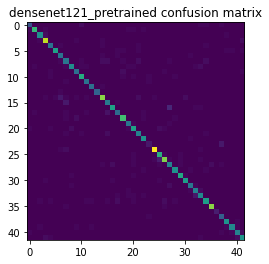

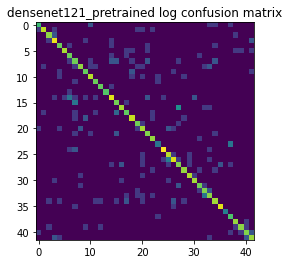

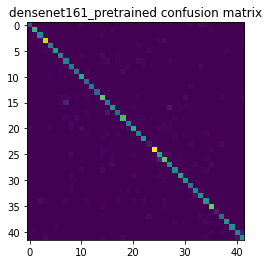

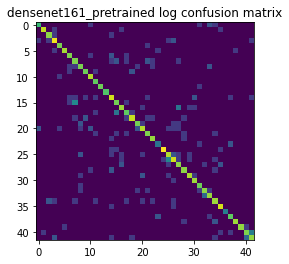

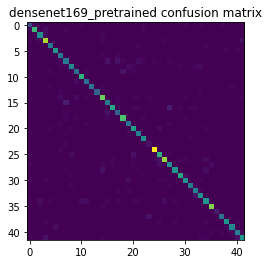

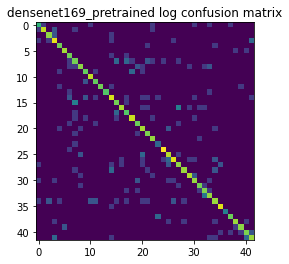

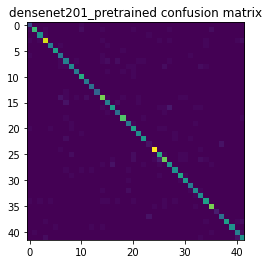

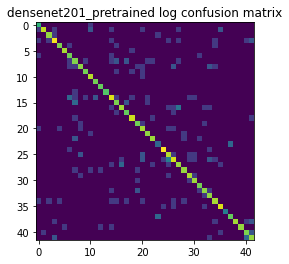

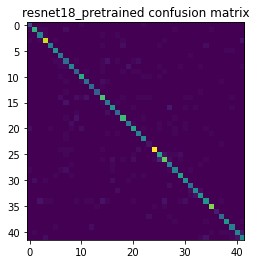

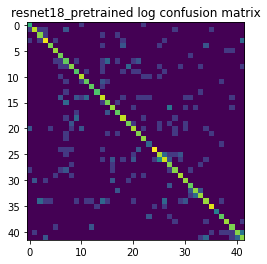

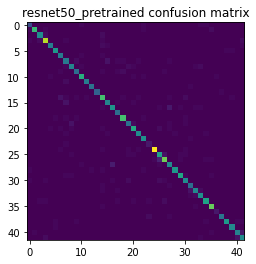

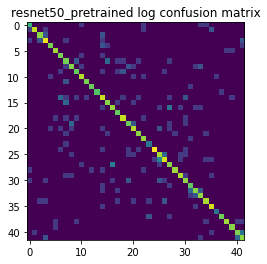

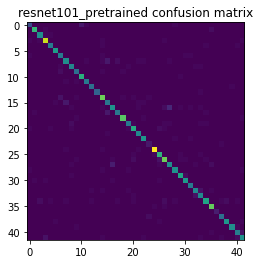

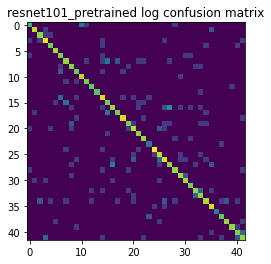

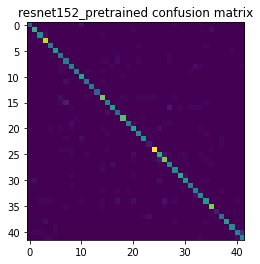

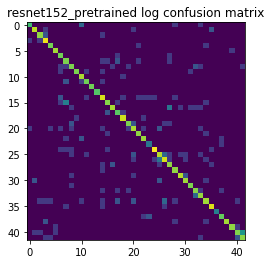

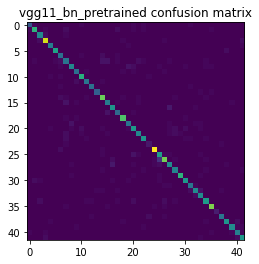

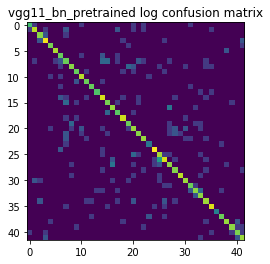

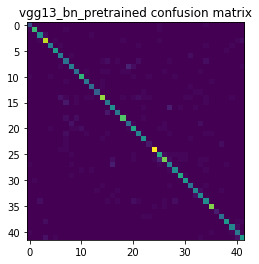

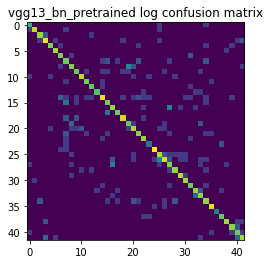

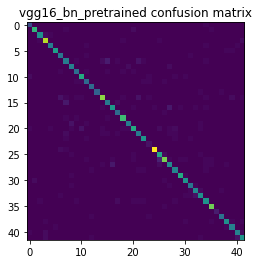

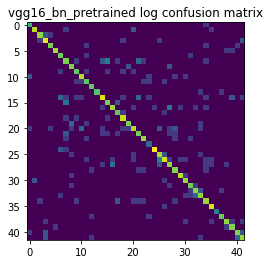

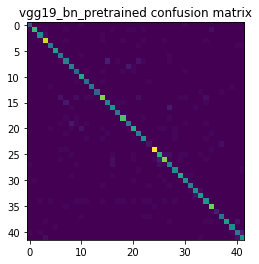

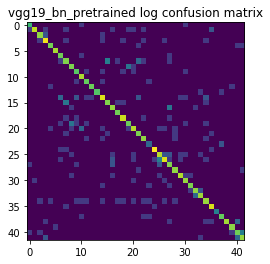

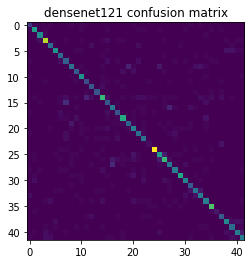

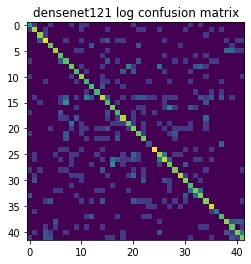

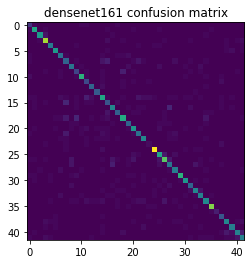

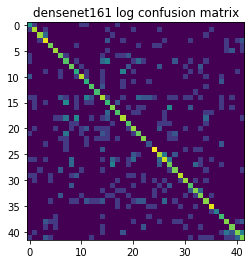

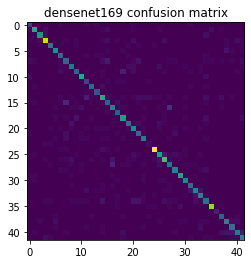

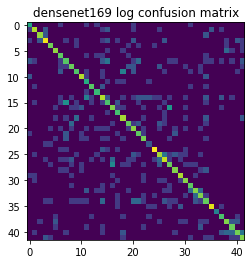

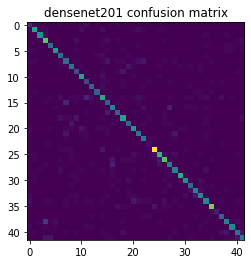

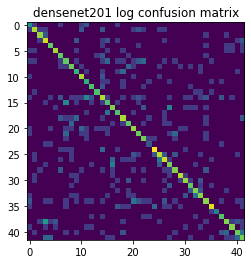

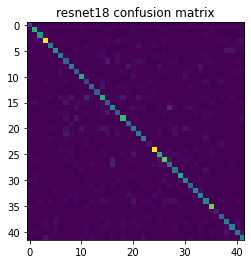

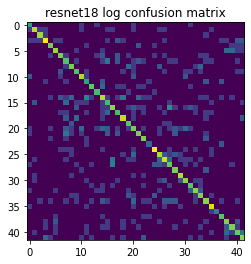

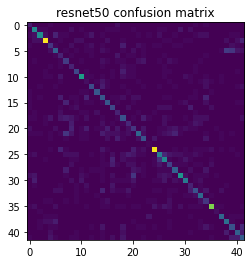

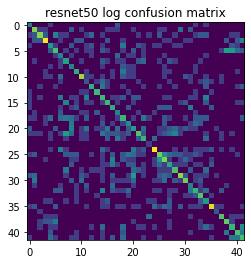

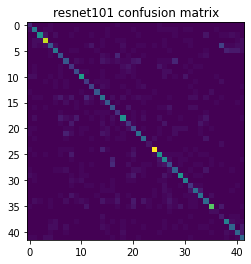

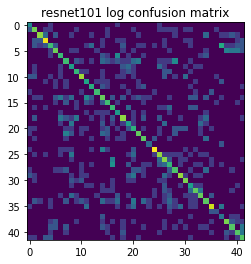

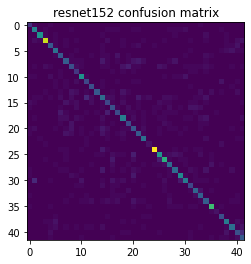

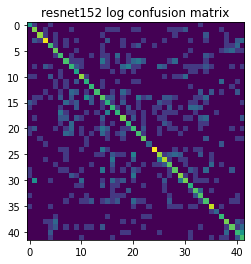

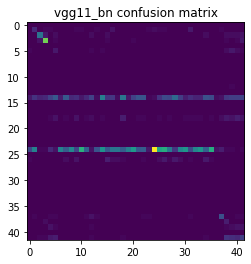

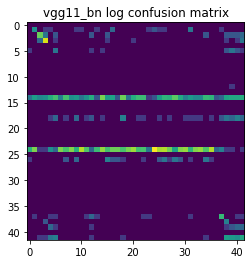

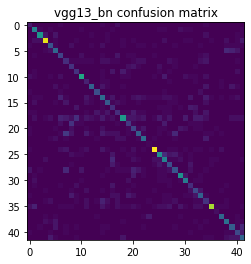

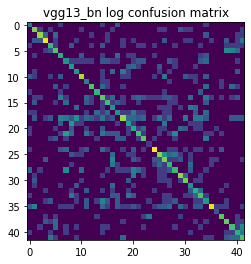

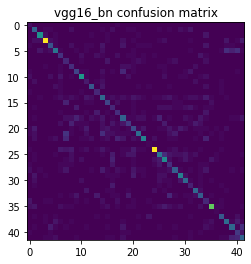

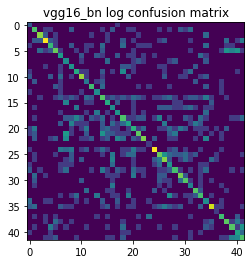

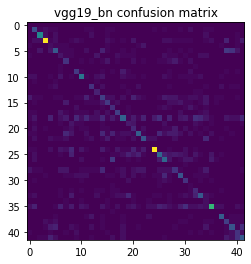

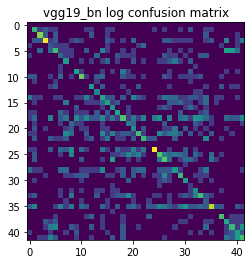

In [13]:
evaluate_table = {
    'model':[],
    'precision':[],
    'recall':[],
    'f1score':[]
}

all_evaluate_table =  {
    'model':[],
    'top1 train acc':[],
    'top5 train acc':[],
    'top1 val acc':[],
    'top5 val acc':[],
    'precision':[],
    'recall':[],
    'f1score':[]
}

for model in all_valid_models:
    if '_pretrained' in model:
        model_name = model[:-len('_pretrained')]
        print(model_name)
        pred_result = pandas.read_csv('./models/pretrained/'+model_name+'/best_pred.csv')
    else:
        pred_result = pandas.read_csv('./models/raw/'+model+'/best_pred.csv')
    conf_matrix = confusion_matrix(pred_result['pred'].values, pred_result['target'].values)
    plt.figure()
    plt.imshow(conf_matrix)
    plt.title(model + ' confusion matrix')
    plt.savefig('./plots/conf_matrix/'+model+'_conf')

    plt.figure()
    plt.imshow(np.log(conf_matrix+1))
    plt.title(model + ' log confusion matrix')
    plt.savefig('./plots/conf_matrix/'+model+'_log_conf')


    accuracy = accuracy_score(pred_result['pred'].values, pred_result['target'].values)

    precision = precision_score(pred_result['pred'].values, pred_result['target'].values, average='macro')
    recall =recall_score(pred_result['pred'].values, pred_result['target'].values, average='macro')

    f1score = f1_score(pred_result['pred'].values, pred_result['target'].values, average='macro')

    

    evaluate_table['model'].append(model)

    evaluate_table['precision'].append(precision)
    evaluate_table['recall'].append(recall)
    evaluate_table['f1score'].append(f1score)


    all_evaluate_table['model'].append(model)

    all_evaluate_table['precision'].append(precision)
    all_evaluate_table['recall'].append(recall)
    all_evaluate_table['f1score'].append(f1score)

    all_evaluate_table['top1 train acc'].append(train_best1[model])
    all_evaluate_table['top5 train acc'].append(train_best5[model])
    all_evaluate_table['top1 val acc'].append(val_best1[model])
    all_evaluate_table['top5 val acc'].append(val_best5[model])

    


In [14]:
all_evaluate_table = pandas.DataFrame(all_evaluate_table).sort_index(by='f1score',ascending=False)
all_evaluate_table.to_excel('./plots/table/summary.xlsx',index=False)
all_evaluate_table.to_csv('./plots/table/summary.csv',index=False)
all_evaluate_table

model  top1 train acc  top5 train acc  top1 val acc  \
3   densenet201_pretrained       96.553284       99.433067     88.315926   
7     resnet152_pretrained       96.868965       99.478165     87.793732   
6     resnet101_pretrained       96.488861       99.471725     87.728462   
1   densenet161_pretrained       96.881851       99.581245     87.597916   
5      resnet50_pretrained       95.625565       99.323547     87.075722   
10     vgg16_bn_pretrained       93.409355       98.730835     86.553528   
11     vgg19_bn_pretrained       92.951942       98.634201     86.618797   
2   densenet169_pretrained       95.960579       99.329987     86.618797   
0   densenet121_pretrained       95.348541       99.265564     86.422981   
9      vgg13_bn_pretrained       93.364258       98.775932     85.835510   
8      vgg11_bn_pretrained       92.971268       98.737282     84.856400   
4      resnet18_pretrained       94.272652       98.982094     84.007835   
14             densenet169       84.177299       96.875404     72.389038   
13             densenet161       86.045616       97.390800     72.193214   
15             densenet201       84.557404       97.017143     71.801567   
16                resnet18       78.991112       95.554703     71.018280   
12             densenet121       83.752098       96.875404     71.540474   
19               resnet152       63.677364       89.131561     58.550915   
18               resnet101       55.546967       84.821548     54.634464   
21                vgg13_bn       41.367092       74.764854     47.715405   
22                vgg16_bn       38.596832       72.426239     44.060055   
17                resnet50       41.586136       73.869347     42.885117   
23                vgg19_bn       26.890865       59.644379     32.571800   
20                vgg11_bn       11.809046       34.344803     13.772846   

    top5 val acc  precision    recall   f1score  
3      98.368149   0.875847  0.885410  0.879006  
7      98.433418   0.876586  0.881747  0.877162  
6      98.237602   0.872996  0.879796  0.874853  
1      98.107048   0.872647  0.874783  0.872867  
5      98.563972   0.864252  0.874102  0.867394  
10     98.172325   0.856041  0.876274  0.862144  
11     98.107048   0.858487  0.867962  0.861457  
2      98.237602   0.857124  0.866090  0.858973  
0      97.911232   0.857162  0.861307  0.857710  
9      97.584854   0.851567  0.857120  0.853382  
8      97.258484   0.845616  0.848022  0.845594  
4      96.997391   0.831758  0.848254  0.836957  
14     91.906006   0.711561  0.732716  0.717644  
13     92.493477   0.707688  0.716291  0.709063  
15     92.362923   0.706021  0.712789  0.706124  
16     91.318542   0.700904  0.710824  0.702872  
12     91.906006   0.696254  0.709401  0.699413  
19     84.725853   0.570370  0.588383  0.572743  
18     84.073105   0.522692  0.534083  0.519790  
21     78.851173   0.450370  0.499562  0.453678  
22     77.154045   0.408509  0.462723  0.405880  
17     75.979111   0.405555  0.430049  0.400516  
23     63.707573   0.286333  0.287742  0.269813  
20     38.707573   0.102604  0.091362  0.078457

# Metrics Rank

In [15]:
rank_table = all_evaluate_table.rank(ascending=False)
rank_table


model  top1 train acc  top5 train acc  top1 val acc  top5 val acc  \
3    17.0             3.0             4.0           1.0           3.0   
7    13.0             2.0             2.0           2.0           2.0   
6    15.0             4.0             3.0           3.0           4.5   
1    21.0             1.0             1.0           4.0           7.5   
5     9.0             6.0             6.0           5.0           1.0   
10    3.0             9.0            11.0           8.0           6.0   
11    1.0            12.0            12.0           6.5           7.5   
2    19.0             5.0             5.0           6.5           4.5   
0    23.0             7.0             7.0           9.0           9.0   
9     5.0            10.0             9.0          10.0          10.0   
8     7.0            11.0            10.0          11.0          11.0   
4    11.0             8.0             8.0          12.0          12.0   
14   20.0            15.0            15.5          13.0          15.5   
13   22.0            13.0            13.0          14.0          13.0   
15   18.0            14.0            14.0          15.0          14.0   
16   12.0            17.0            17.0          17.0          17.0   
12   24.0            16.0            15.5          16.0          15.5   
19   14.0            18.0            18.0          18.0          18.0   
18   16.0            19.0            19.0          19.0          19.0   
21    6.0            21.0            20.0          20.0          20.0   
22    4.0            22.0            22.0          21.0          21.0   
17   10.0            20.0            21.0          22.0          22.0   
23    2.0            23.0            23.0          23.0          23.0   
20    8.0            24.0            24.0          24.0          24.0   

    precision  recall  f1score  
3         2.0     1.0      1.0  
7         1.0     2.0      2.0  
6         3.0     3.0      3.0  
1         4.0     5.0      4.0  
5         5.0     6.0      5.0  
10        9.0     4.0      6.0  
11        6.0     7.0      7.0  
2         8.0     8.0      8.0  
0         7.0     9.0      9.0  
9        10.0    10.0     10.0  
8        11.0    12.0     11.0  
4        12.0    11.0     12.0  
14       13.0    13.0     13.0  
13       14.0    14.0     14.0  
15       15.0    15.0     15.0  
16       16.0    16.0     16.0  
12       17.0    17.0     17.0  
19       18.0    18.0     18.0  
18       19.0    19.0     19.0  
21       20.0    20.0     20.0  
22       21.0    21.0     21.0  
17       22.0    22.0     22.0  
23       23.0    23.0     23.0  
20       24.0    24.0     24.0

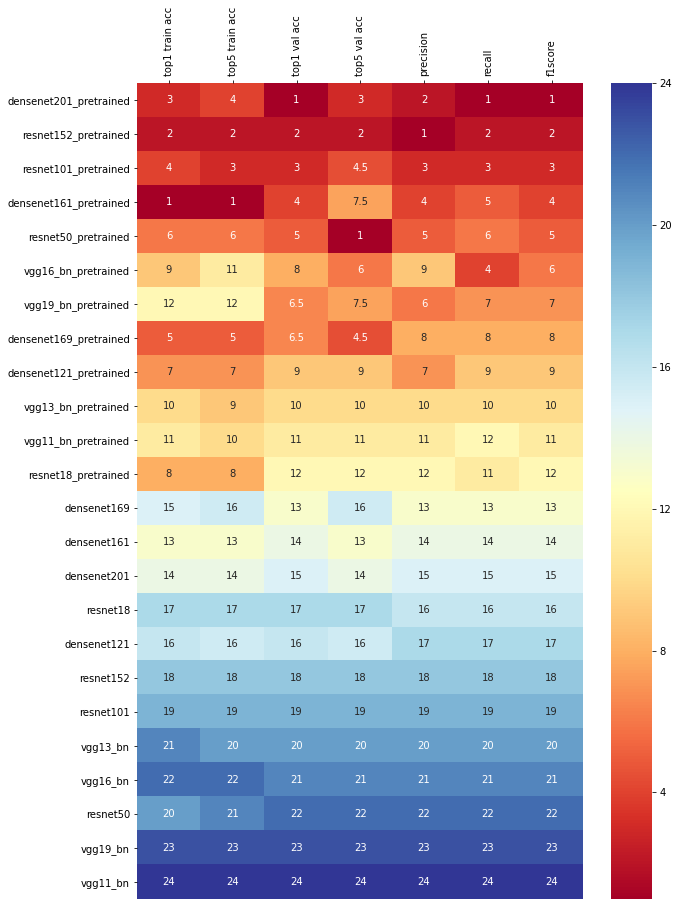

In [16]:
import seaborn as sns
rank = np.array(rank_table)[:,1:]

f, ax = plt.subplots(figsize=[10,15])
g = sns.heatmap(rank,annot=True,xticklabels=rank_table.columns[1:],
yticklabels=all_evaluate_table['model'].values,
cmap='RdYlBu')
ax.xaxis.tick_top()
plt.xticks(rotation = 90)
#plt.yticks(rotation = 60)
plt.savefig('./plots/rank.png', bbox_inches='tight')


In [31]:
# add best model
pred_result = pandas.read_csv('./models/new_result.csv')
accuracy = accuracy_score(pred_result['pred'].values,pred_result['target'].values)

precision = precision_score(pred_result['pred'].values, pred_result['target'].values, average='macro')
recall =recall_score(pred_result['pred'].values, pred_result['target'].values, average='macro')

f1score = f1_score(pred_result['pred'].values, pred_result['target'].values, average='macro')

print(accuracy)
print(precision)
print(recall)
print(f1score)

    
new_eval_table = {
    'model':all_evaluate_table['model'].values.tolist(),
    'top1 val acc':all_evaluate_table['top1 val acc'].values.tolist(),
    'precision':all_evaluate_table['precision'].values.tolist(),
    'recall':all_evaluate_table['recall'].values.tolist(),
    'f1score':all_evaluate_table['f1score'].values.tolist()
}


new_eval_table['model'].append('resnet101_32x8d')
new_eval_table['top1 val acc'].append(accuracy*100)
new_eval_table['precision'].append(precision)
new_eval_table['recall'].append(recall)
new_eval_table['f1score'].append(f1score)

new_eval_table = pandas.DataFrame(new_eval_table).sort_index(by='f1score',ascending=False)
new_eval_table.to_csv('./plots/table/new_eval.csv')
new_eval_table
# all_evaluate_table['model'].append(model)

# all_evaluate_table['precision'].append(precision)
# all_evaluate_table['recall'].append(recall)
# all_evaluate_table['f1score'].append(f1score)

# all_evaluate_table['top1 train acc'].append(train_best1[model])
# all_evaluate_table['top5 train acc'].append(train_best5[model])
# all_evaluate_table['top1 val acc'].append(val_best1[model])
# all_evaluate_table['top5 val acc'].append(val_best5[model])


0.9295039164490861
0.931209975793079
0.9176541441562
0.9214380154733397


model  top1 val acc  precision    recall   f1score
24         resnet101_32x8d     92.950392   0.931210  0.917654  0.921438
0   densenet201_pretrained     88.315926   0.875847  0.885410  0.879006
1     resnet152_pretrained     87.793732   0.876586  0.881747  0.877162
2     resnet101_pretrained     87.728462   0.872996  0.879796  0.874853
3   densenet161_pretrained     87.597916   0.872647  0.874783  0.872867
4      resnet50_pretrained     87.075722   0.864252  0.874102  0.867394
5      vgg16_bn_pretrained     86.553528   0.856041  0.876274  0.862144
6      vgg19_bn_pretrained     86.618797   0.858487  0.867962  0.861457
7   densenet169_pretrained     86.618797   0.857124  0.866090  0.858973
8   densenet121_pretrained     86.422981   0.857162  0.861307  0.857710
9      vgg13_bn_pretrained     85.835510   0.851567  0.857120  0.853382
10     vgg11_bn_pretrained     84.856400   0.845616  0.848022  0.845594
11     resnet18_pretrained     84.007835   0.831758  0.848254  0.836957
12             densenet169     72.389038   0.711561  0.732716  0.717644
13             densenet161     72.193214   0.707688  0.716291  0.709063
14             densenet201     71.801567   0.706021  0.712789  0.706124
15                resnet18     71.018280   0.700904  0.710824  0.702872
16             densenet121     71.540474   0.696254  0.709401  0.699413
17               resnet152     58.550915   0.570370  0.588383  0.572743
18               resnet101     54.634464   0.522692  0.534083  0.519790
19                vgg13_bn     47.715405   0.450370  0.499562  0.453678
20                vgg16_bn     44.060055   0.408509  0.462723  0.405880
21                resnet50     42.885117   0.405555  0.430049  0.400516
22                vgg19_bn     32.571800   0.286333  0.287742  0.269813
23                vgg11_bn     13.772846   0.102604  0.091362  0.078457

In [32]:
new_rank_table = new_eval_table.rank(ascending=False)
new_rank_table

model  top1 val acc  precision  recall  f1score
24   16.0           1.0        1.0     1.0      1.0
0    18.0           2.0        3.0     2.0      2.0
1    13.0           3.0        2.0     3.0      3.0
2    15.0           4.0        4.0     4.0      4.0
3    22.0           5.0        5.0     6.0      5.0
4     9.0           6.0        6.0     7.0      6.0
5     3.0           9.0       10.0     5.0      7.0
6     1.0           7.5        7.0     8.0      8.0
7    20.0           7.5        9.0     9.0      9.0
8    24.0          10.0        8.0    10.0     10.0
9     5.0          11.0       11.0    11.0     11.0
10    7.0          12.0       12.0    13.0     12.0
11   11.0          13.0       13.0    12.0     13.0
12   21.0          14.0       14.0    14.0     14.0
13   23.0          15.0       15.0    15.0     15.0
14   19.0          16.0       16.0    16.0     16.0
15   12.0          18.0       17.0    17.0     17.0
16   25.0          17.0       18.0    18.0     18.0
17   14.0          19.0       19.0    19.0     19.0
18   17.0          20.0       20.0    20.0     20.0
19    6.0          21.0       21.0    21.0     21.0
20    4.0          22.0       22.0    22.0     22.0
21   10.0          23.0       23.0    23.0     23.0
22    2.0          24.0       24.0    24.0     24.0
23    8.0          25.0       25.0    25.0     25.0

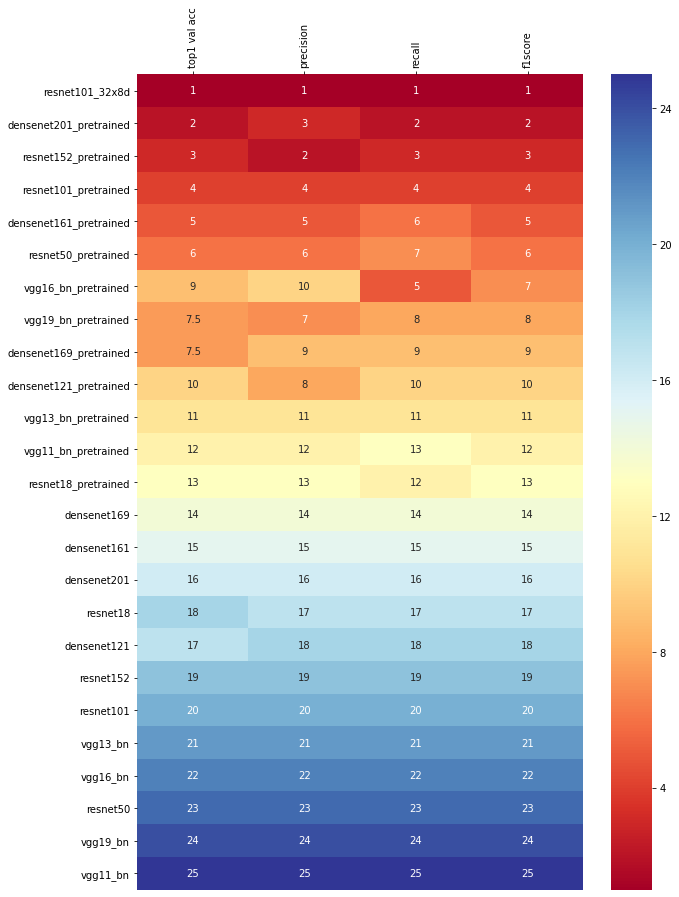

In [33]:
rank = np.array(new_rank_table)[:,1:]

f, ax = plt.subplots(figsize=[10,15])
g = sns.heatmap(rank,annot=True,xticklabels=new_rank_table.columns[1:],
yticklabels=new_eval_table['model'].values,
cmap='RdYlBu')
ax.xaxis.tick_top()
plt.xticks(rotation = 90)
#plt.yticks(rotation = 60)
plt.savefig('./plots/new_rank.png', bbox_inches='tight')